In [19]:
from rxnutils import chem
from rxnmapper import RXNMapper
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import os
import pandas as pd
import ast
from rdkit.Chem import Draw

## reductive amination

In [10]:
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data')
df = pd.read_csv('D68EV3CPROA_enumeration_oct10_first_route_1_step_OUTPUT.csv', index_col=0)
df = df[df.rxn_order_first_to_last == "['Reductive amination']"]
df

,smiles,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock,dir_name,Done_Time,Analogs
9,Cc1nnc2c(NCc3ccc4c(c3)OCO4)nccn12,1,['Reductive amination'],"[('O=Cc1ccc2c(c1)OCO2', 'Cc1nnc2c(N)nccn12')]","['Cc1nnc2c(NCc3ccc4c(c3)OCO4)nccn12', 'Cc1nnc2...","['enamine_real', 'enamine_bb', 'enamine_made',...","['ENAMINE_Z1230717304_x0147_0A_x1140_0A', 'ENA...",NaN,NaN
40,O[C@@H](CNCc1nnc2ccccn12)c1ccc2c(c1)OCO2,1,['Reductive amination'],"[('O=Cc1nnc2ccccn12', 'NCC(O)c1ccc2c(c1)OCO2')]","['O=Cc1nnc2ccccn12', 'NCC(O)c1ccc2c(c1)OCO2', ...","['mcule', 'molport', 'enamine_made', 'enamine_...",['MOLPORT_009-076-414_x1140_0A_x1594_0A'],NaN,NaN
66,Cc1cc(C(=O)N[C@H](C)[C@H](C)NCc2ccccn2)no1,1,['Reductive amination'],"[('O=Cc1ccccn1', 'Cc1cc(C(=O)NC(C)C(C)N)no1')]","['Cc1cc(C(=O)NC(C)C(C)N)no1', None, 'O=Cc1cccc...","['enamine_made', 'enamine_real', 'generic', 'e...",['ENAMINE_PV-000980621569_x1052_1A_x1498_0A'],10/17/23 7:20,0.0
144,CCOC(=O)C[C@@H](c1cc(C)on1)N1CCCCC1,1,['Reductive amination'],"[('CCOC(=O)CC(=O)c1cc(C)on1', 'C1CCNCC1')]","['C1CCNCC1', 'CCOC(=O)CC(=O)c1cc(C)on1', 'CCOC...","['generic', 'mcule', 'mcule', 'enamine_made']",['CHEMSPACE-BB_CSMB00133658290_x1052_1A_x1083_...,10/17/23 10:00,0.0
154,C[C@@H](F)CCNC1CCN(C(=O)CCN2CCCCC2)CC1,1,['Reductive amination'],"[('O=C1CCN(C(=O)CCN2CCCCC2)CC1', 'CC(F)CCN')]","['CC(F)CCN', None, 'O=C1CCN(C(=O)CCN2CCCCC2)CC1']","['molport', 'mcule', 'enamine_bb', 'enamine_ma...",['ENAMINE_PV-000745136799_x1083_0A_x1071_0A'],2023-10-20 07:49:20,0.0
167,c1cncc([C@@H]2CCC[C@@H](NCc3ccc4c(c3)OCO4)C2)c1,1,['Reductive amination'],"[('O=C1CCCC(c2cccnc2)C1', 'NCc1ccc2c(c1)OCO2')]","['c1cncc(C2CCCC(NCc3ccc4c(c3)OCO4)C2)c1', 'O=C...","['enamine_real', 'enamine_bb', 'mcule', 'enami...",['ENAMINE_Z2001417850_x1498_0A_x1140_0A'],2023-10-20 08:10:25,0.0
202,COc1cccc(CN[C@H](Cc2ccc3c(c2)OCO3)C(=O)O)n1,1,['Reductive amination'],"[('NC(Cc1ccc2c(c1)OCO2)C(=O)O', 'COc1cccc(C=O)...","['NC(Cc1ccc2c(c1)OCO2)C(=O)O', 'COc1cccc(C=O)n...","['mcule', 'enamine_made', 'enamine_bb', 'mcule...",['ENAMINE_Z1860323261_x1498_0A_x1140_0A'],10/17/23 10:24,0.0
254,Cc1cc(C(=O)NCC[C@@H](C)NCC(=O)N2CCCCC2)no1,1,['Reductive amination'],"[('NCC(=O)N1CCCCC1', 'CC(=O)CCNC(=O)c1cc(C)on1')]","['NCC(=O)N1CCCCC1', 'CC(=O)CCNC(=O)c1cc(C)on1'...","['enamine_real', 'enamine_bb', 'generic', 'mol...","['ENAMINE_PV-000791373338,ENAMINE_PV-000968064...",10/17/23 11:35,0.0
260,FC(F)(F)C(F)(F)[C@@H]1CCCN(CCCN2CCCCC2)C1,1,['Reductive amination'],"[('O=CCCN1CCCCC1', 'FC(F)(F)C(F)(F)C1CCCNC1')]","['FC(F)(F)C(F)(F)C1CCCN(CCCN2CCCCC2)C1', 'O=CC...","['enamine_real', 'mcule', 'enamine_made', 'mol...",['ENAMINE_Z3882913443_x1083_0A_x1071_0A'],10/17/23 11:40,0.0
293,CC(C)(C)c1cncc(CN[C@@H](CN2CCCCC2)C(=O)O)c1,1,['Reductive amination'],"[('NC(CN1CCCCC1)C(=O)O', 'CC(C)(C)c1cncc(C=O)c...","[None, 'NC(CN1CCCCC1)C(=O)O', 'CC(C)(C)c1cncc(...","['enamine_made', 'molport', 'enamine_bb', 'mcu...",['ENAMINE_Z3255855012_x1498_0A_x1083_0A'],10/17/23 12:18,0.0


In [11]:
r1 = df.iloc[0]
r1

smiles                                           Cc1nnc2c(NCc3ccc4c(c3)OCO4)nccn12
num_steps                                                                        1
rxn_order_first_to_last                                    ['Reductive amination']
reactants                            [('O=Cc1ccc2c(c1)OCO2', 'Cc1nnc2c(N)nccn12')]
BuildingBlocks                   ['Cc1nnc2c(NCc3ccc4c(c3)OCO4)nccn12', 'Cc1nnc2...
catalogName_for_BuildingBlock    ['enamine_real', 'enamine_bb', 'enamine_made',...
dir_name                         ['ENAMINE_Z1230717304_x0147_0A_x1140_0A', 'ENA...
Done_Time                                                                      NaN
Analogs                                                                        NaN
Name: 9, dtype: object

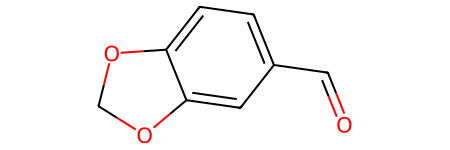

In [21]:
reactant1 = Chem.MolFromSmiles(ast.literal_eval(r1['reactants'])[0][0])
reactant1

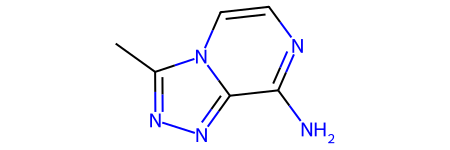

In [22]:
reactant2 = Chem.MolFromSmiles(ast.literal_eval(r1['reactants'])[0][1])
reactant2

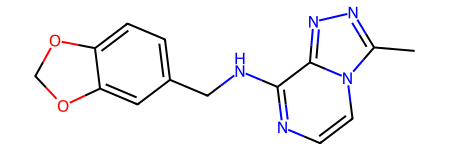

In [23]:
product = Chem.MolFromSmiles(r1['smiles'])
product

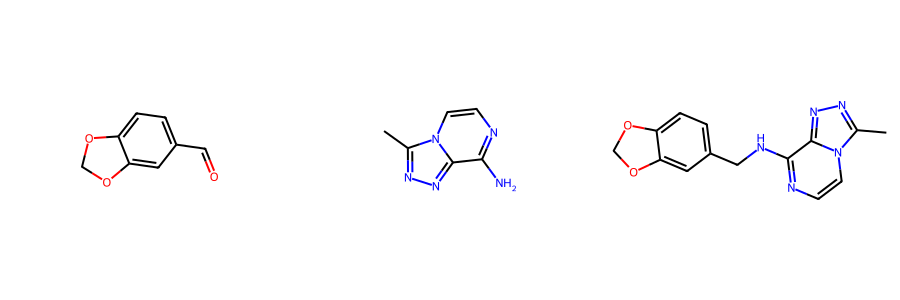

In [24]:
Draw.MolsToGridImage([reactant1, reactant2, product], molsPerRow=3, subImgSize=(300,300))